<a href="https://colab.research.google.com/github/Heena203T1A3134/Mcdonalds/blob/main/CaseSutdy_MCmcdonalds_Heena_Kousar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=574a91307541808ab0efc57581f1a918dee2788fb92db77a9797e850c04e5759
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


**importing libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from warnings import filterwarnings
filterwarnings("ignore")

**#Loading the dataset**

In [30]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mcdonalds.csv')
df.head(20)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df['VisitFrequency'].value_counts()
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

**Exploratory Data Analysis**

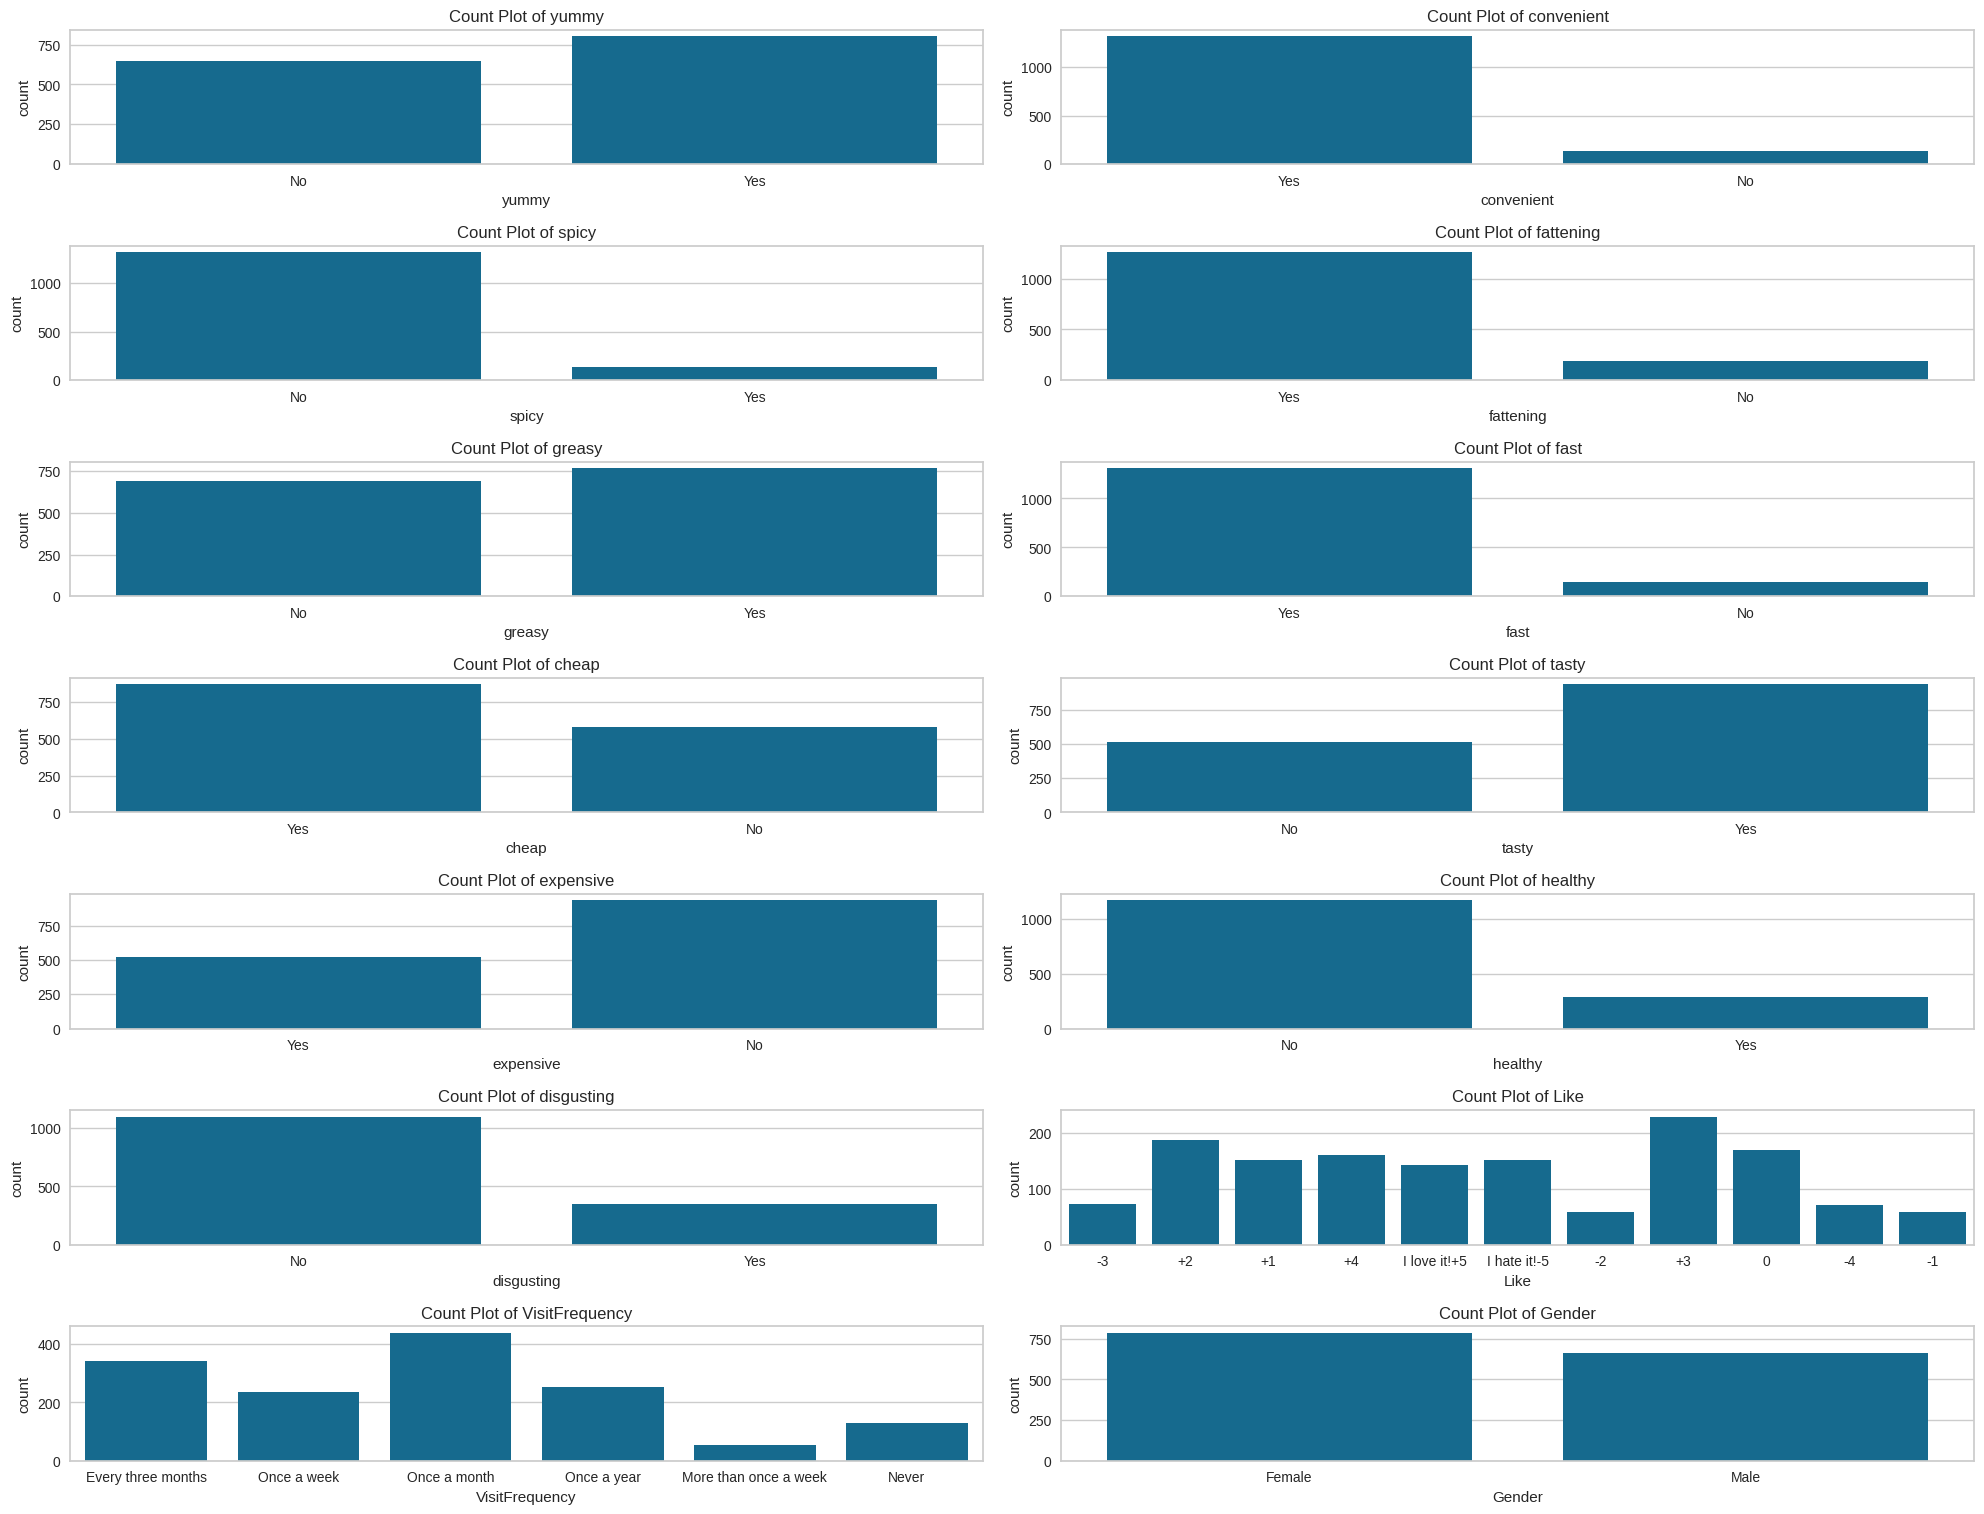

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def EDA(df, figuresize):
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    num_columns = df.select_dtypes(exclude=['object']).columns.tolist()

    plt.figure(figsize=figuresize)

    # Plot count plots for categorical variables
    for i, cat_column in enumerate(cat_columns, 1):
        plt.subplot(len(cat_columns), 2, i)
        sns.countplot(data=df, x=cat_column)
        plt.title(f'Count Plot of {cat_column}')


    plt.tight_layout()
    plt.show()

# Applying the function on the dataset
EDA(df, (20, 30))


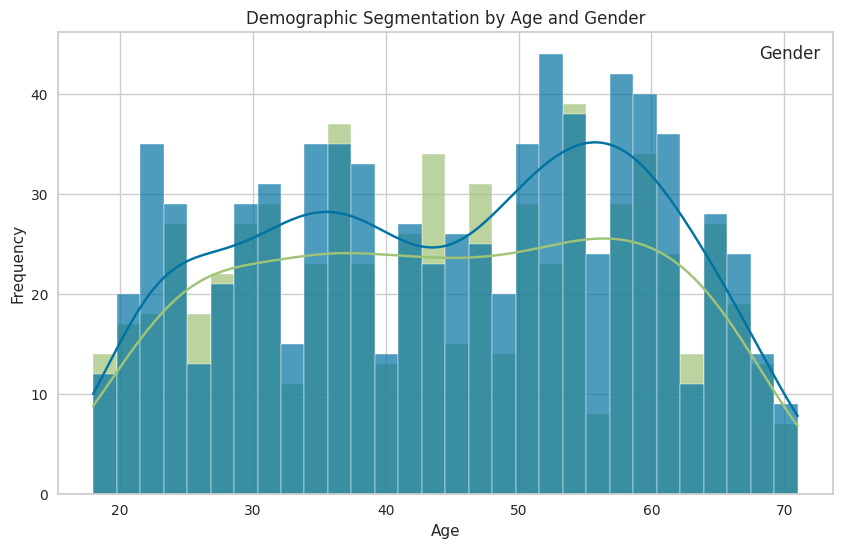

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plotting the demographic segmentation
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', bins=30, kde=True, alpha=0.7)
plt.title('Demographic Segmentation by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()



Extracting segments: distance-based clustering (hierarchical, parti- tioning, hybrid approaches).

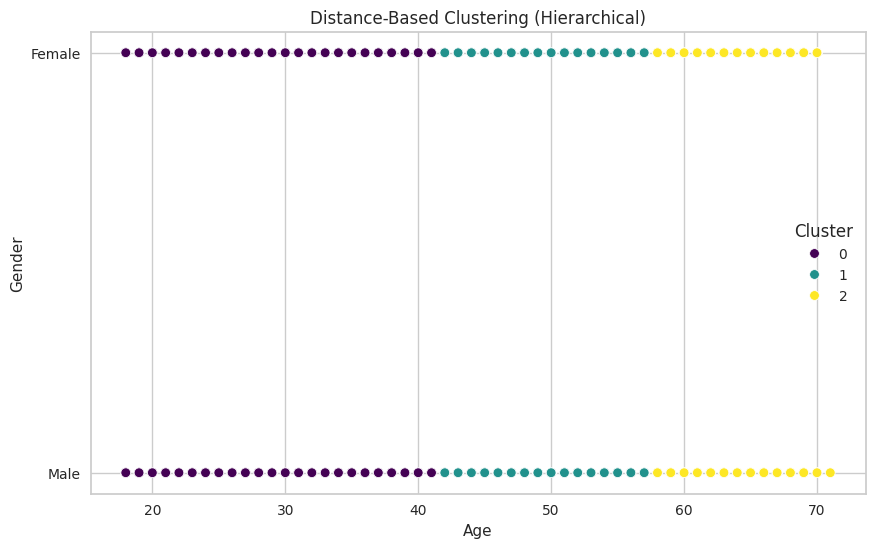

In [20]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant features
X = df[['Age']]

# Initialize hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model
clusters = hierarchical_clustering.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Gender', hue='Cluster', palette='viridis')
plt.title('Distance-Based Clustering (Hierarchical)')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Cluster')
plt.show()


Investigate the data:

In [24]:
print(df.dtypes)

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
Cluster            int32
dtype: object


Convert the categorical column to numeric:

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

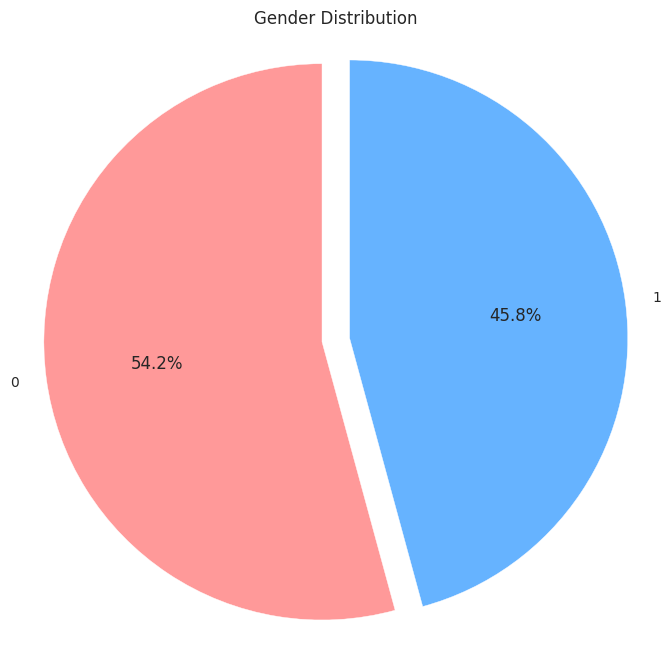

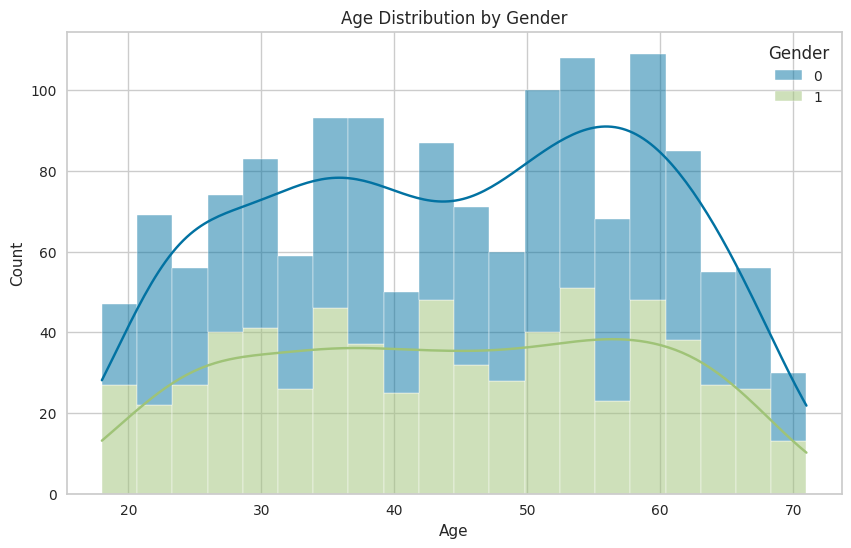

In [75]:
# Demographic segmentation using 'Age' & 'Gender'
# Gender: we infer that there are more female customers than male

# Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Gender', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


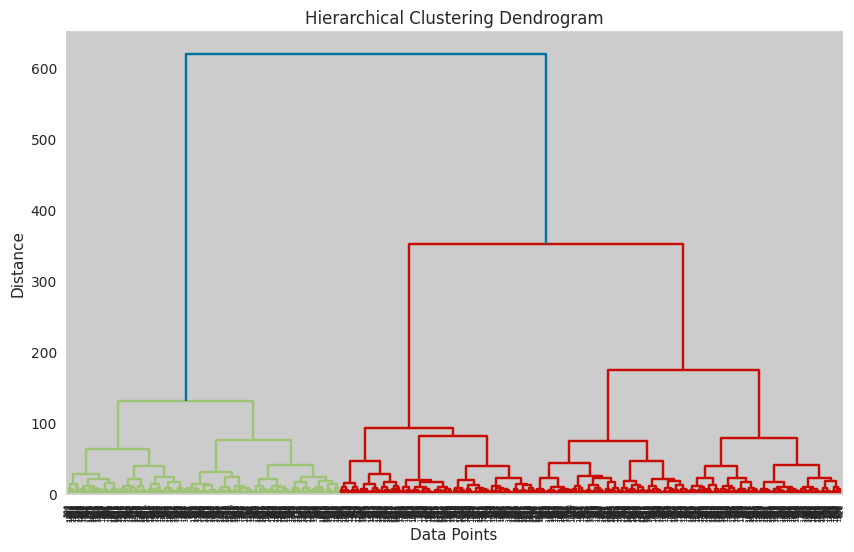

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])

# Drop any non-numeric columns or columns you don't want to include in clustering
numeric_data = df.select_dtypes(include='number')

# Perform hierarchical clustering
linkage_matrix = linkage(numeric_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

# Define the columns you want to encode
columns_to_encode = ['fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like']

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'Yes' to 1 and 'No' to 0 for selected columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df)


     yummy convenient spicy fattening greasy  fast  cheap  tasty  expensive  \
0       No        Yes    No       Yes     No     1      1      0          1   
1      Yes        Yes    No       Yes    Yes     1      1      1          1   
2       No        Yes   Yes       Yes    Yes     1      0      1          1   
3      Yes        Yes    No       Yes    Yes     1      1      1          0   
4       No        Yes    No       Yes    Yes     1      1      0          0   
...    ...        ...   ...       ...    ...   ...    ...    ...        ...   
1448    No        Yes    No       Yes    Yes     0      0      0          1   
1449   Yes        Yes    No       Yes     No     0      1      1          0   
1450   Yes        Yes    No       Yes     No     1      0      1          1   
1451   Yes        Yes    No        No     No     1      1      1          0   
1452    No        Yes    No       Yes    Yes     0      0      0          1   

      healthy  disgusting  Like  Age  VisitFrequenc

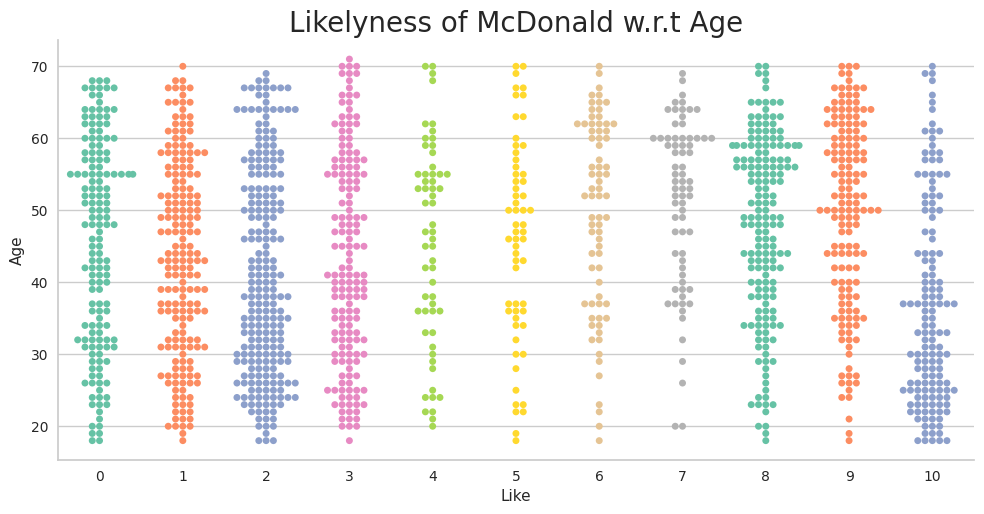

In [62]:
# Pyschographic segmentation using 'Like'

# renaming the category for convinence
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

**Data Preprocessing**

In [63]:
df1 = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [64]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,1,1,0,1,0,0
1,Yes,Yes,No,Yes,Yes,1,1,1,1,0,0
2,No,Yes,Yes,Yes,Yes,1,0,1,1,1,0
3,Yes,Yes,No,Yes,Yes,1,1,1,0,0,1
4,No,Yes,No,Yes,Yes,1,1,0,0,1,0


In [65]:
df_encoded = df1.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


**By Using PCA**

In [66]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [67]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


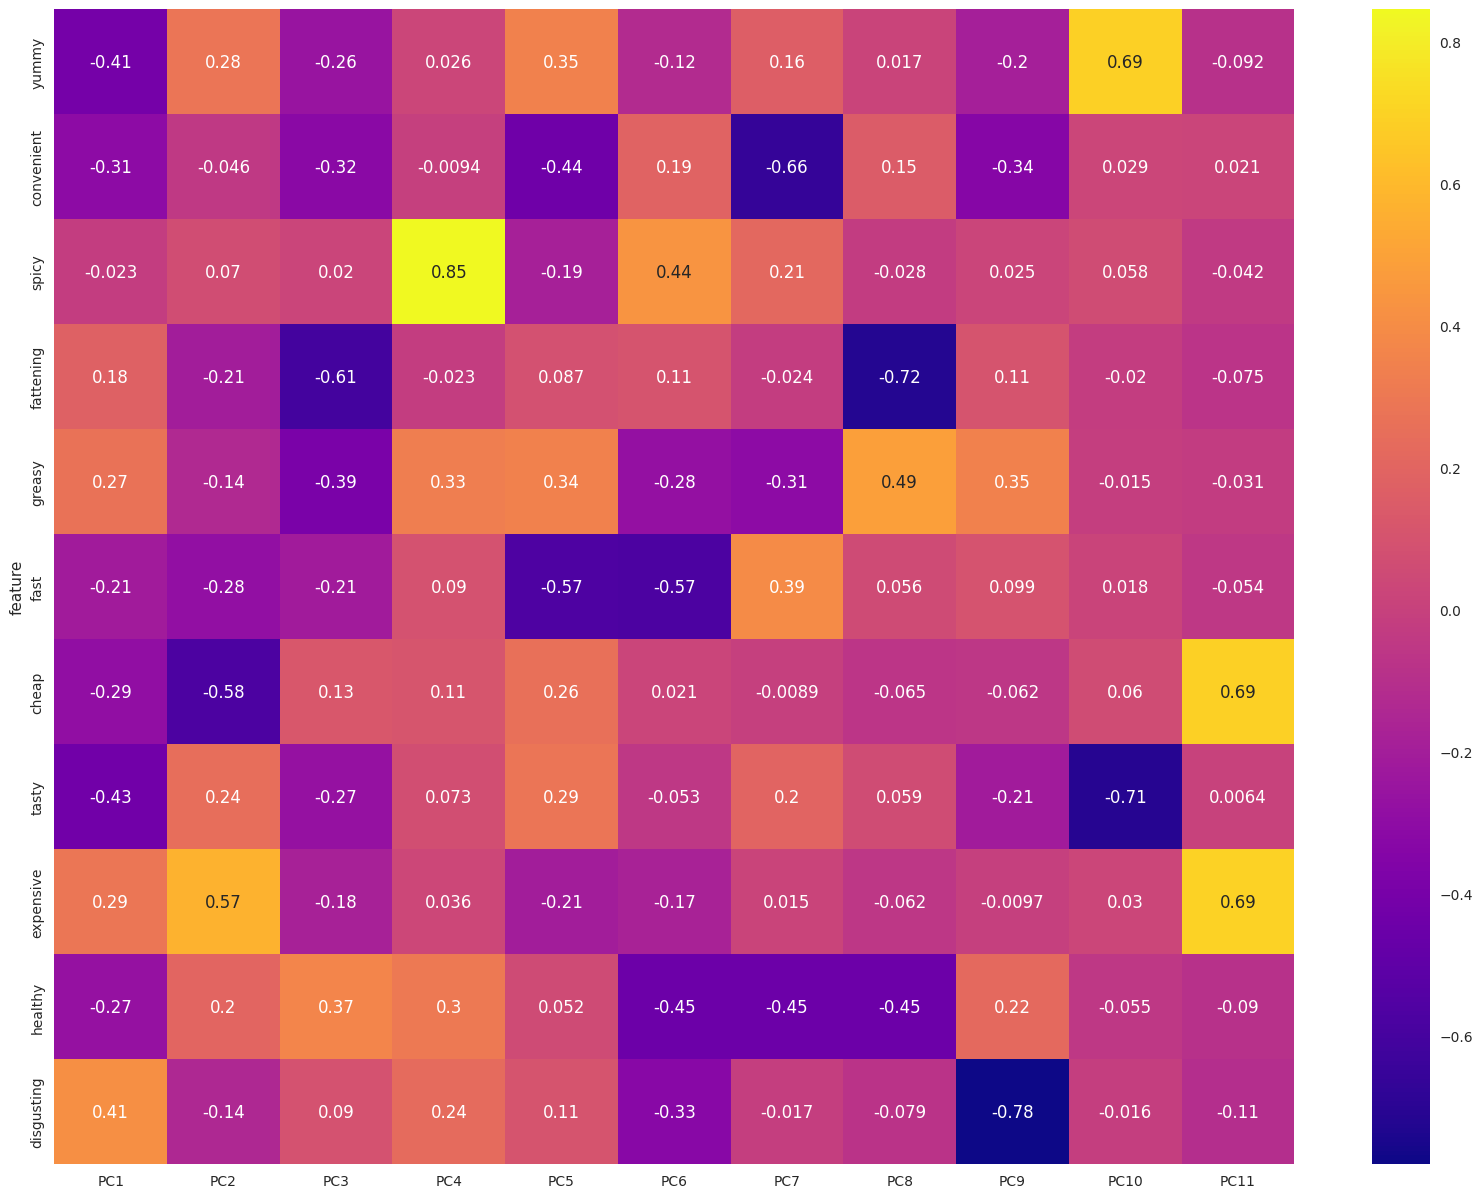

In [68]:
# correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

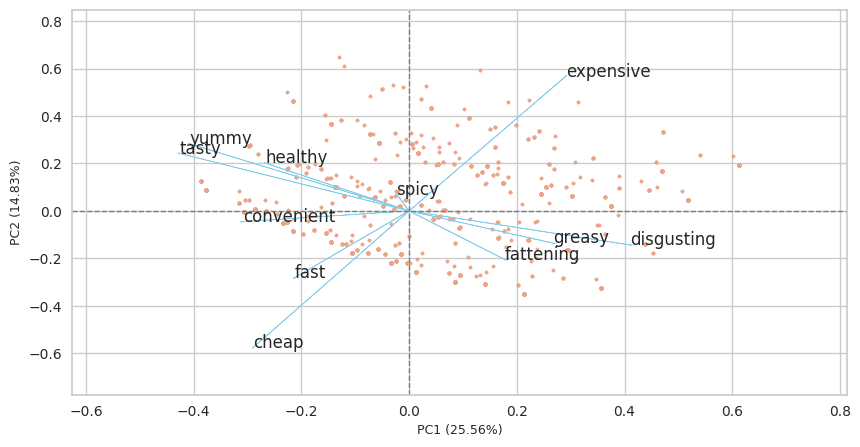

In [69]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

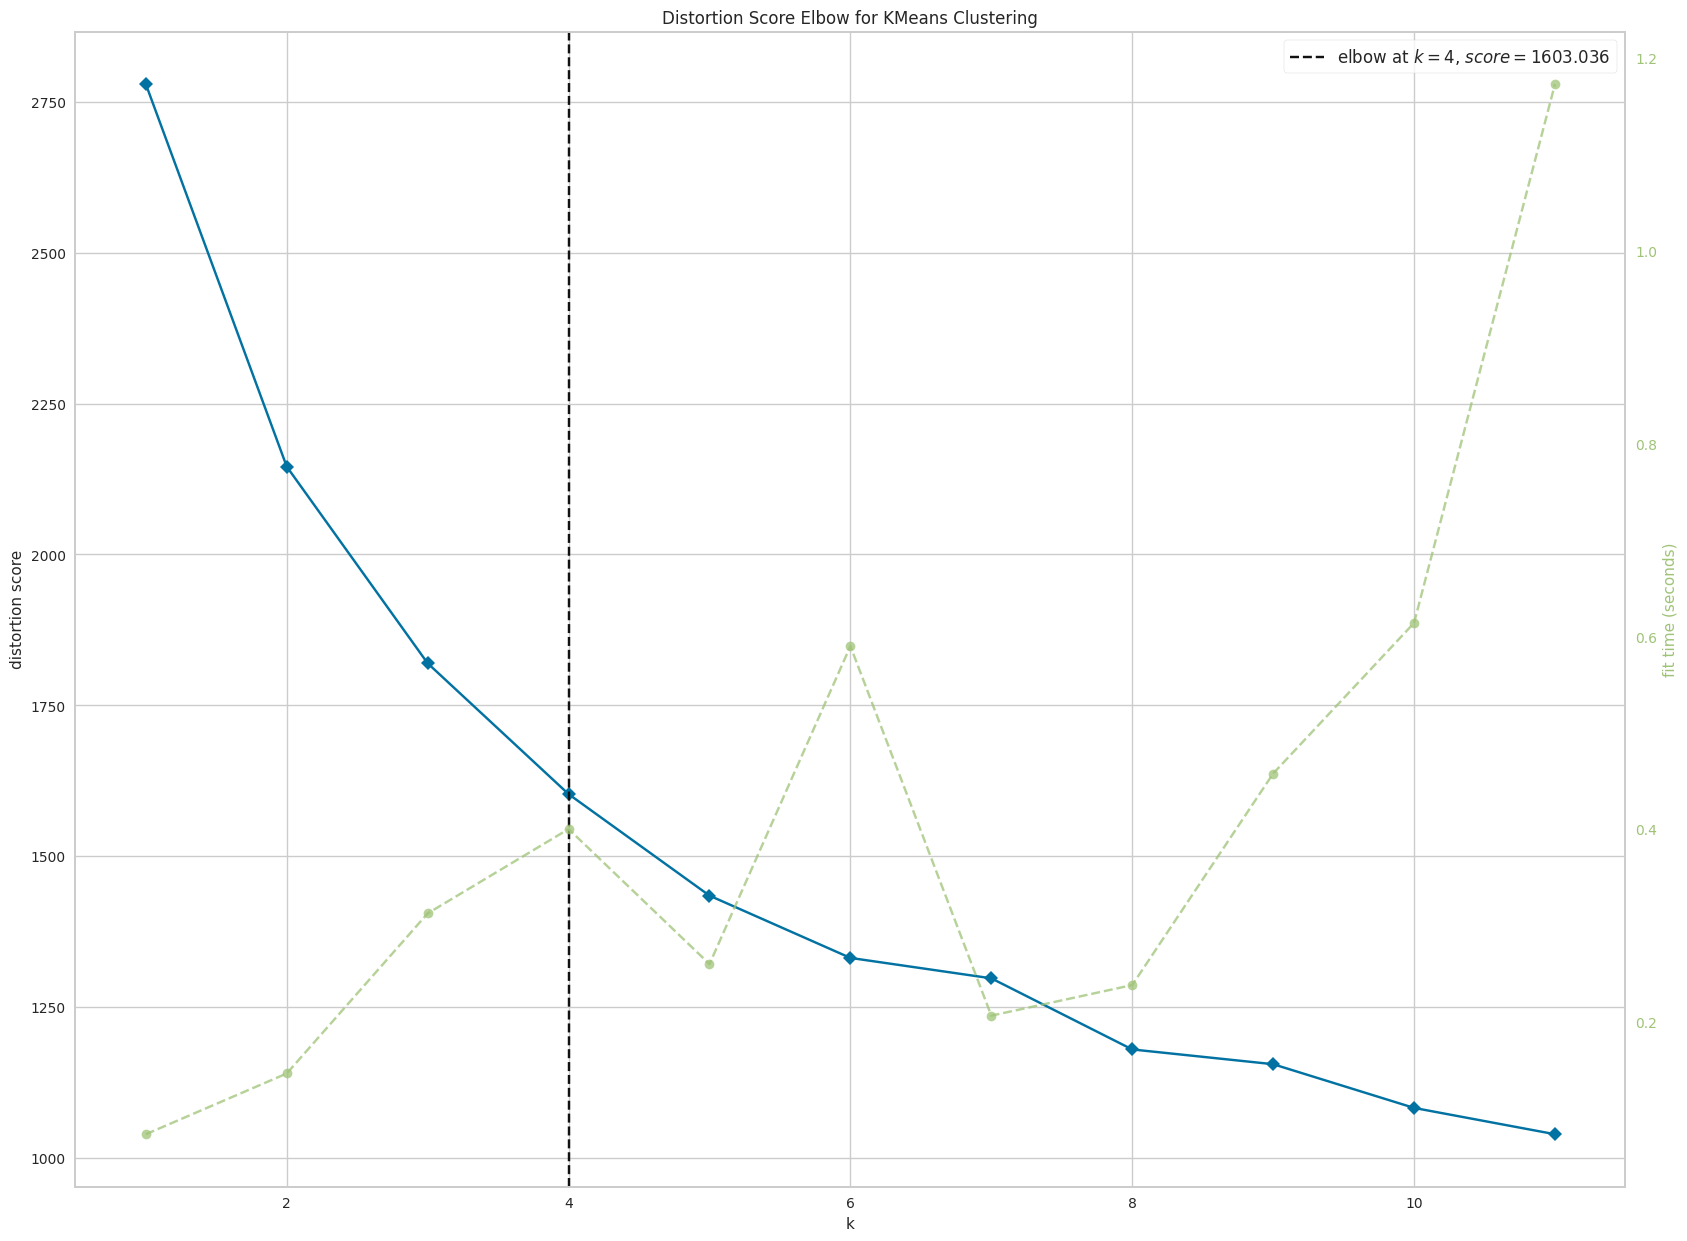

In [70]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

**# k-means clustering**

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558923
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


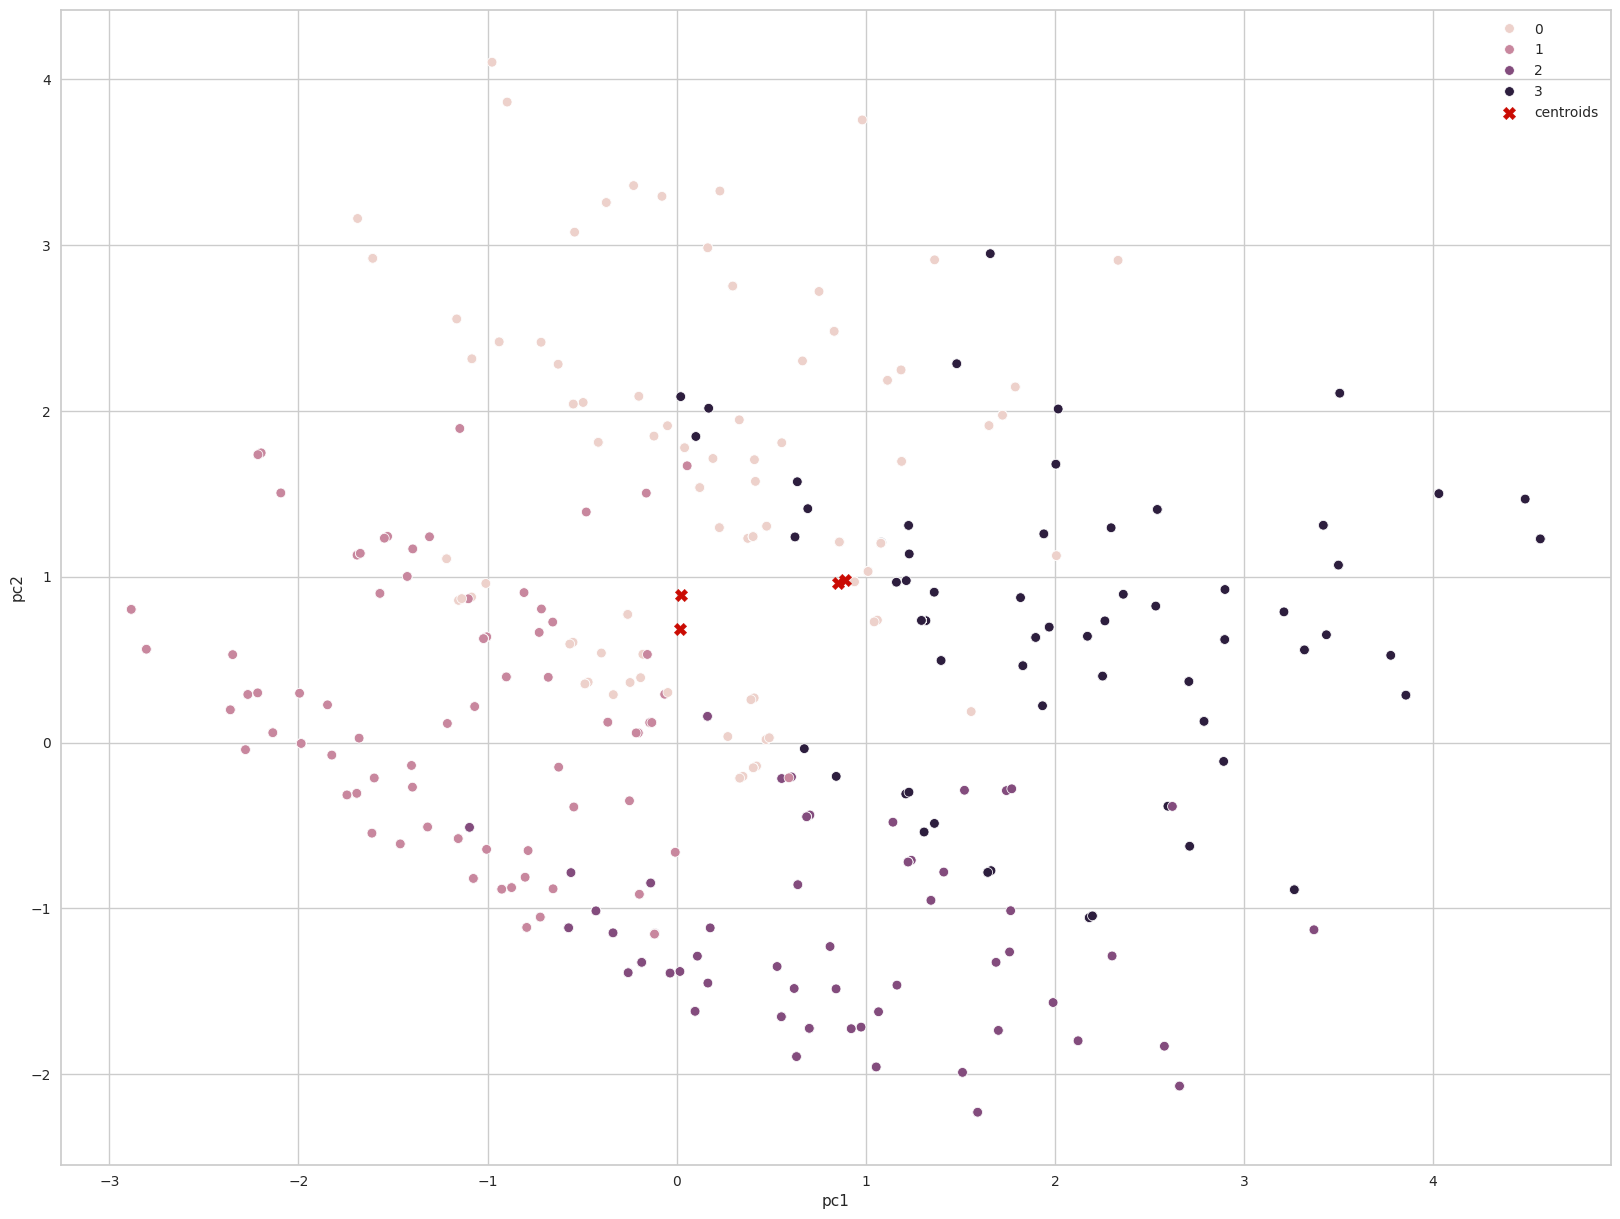

In [72]:
# k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [77]:
print(crosstab.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Like')


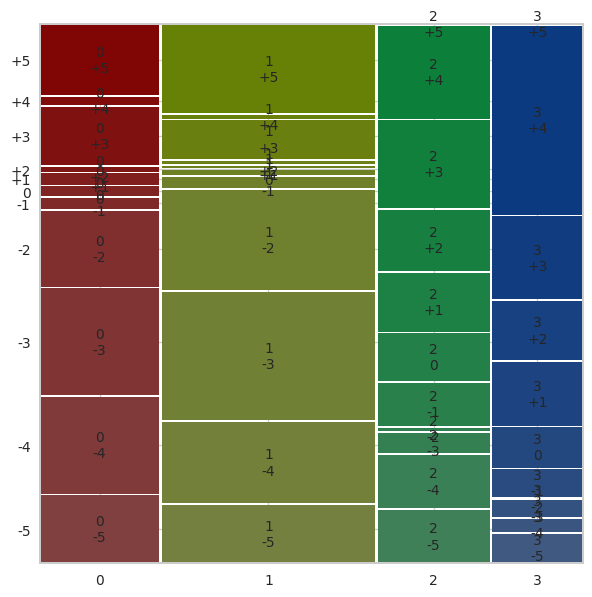

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,42,60,66,47,7,6,7,3,36,5,44
1,65,90,143,111,13,6,2,4,43,4,99
2,31,31,12,2,25,28,34,36,51,54,0
3,14,6,8,0,13,19,30,28,39,89,0


None

In [78]:
# crosstab creation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])
crosstab.columns = ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

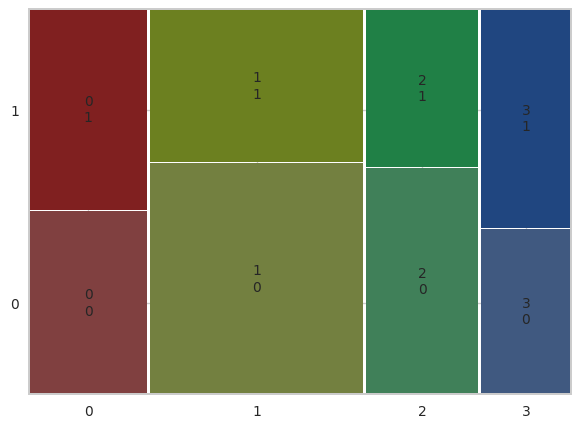

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,42,60,66,47,7,6,7,3,36,5,44
1,65,90,143,111,13,6,2,4,43,4,99
2,31,31,12,2,25,28,34,36,51,54,0
3,14,6,8,0,13,19,30,28,39,89,0


None

In [79]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

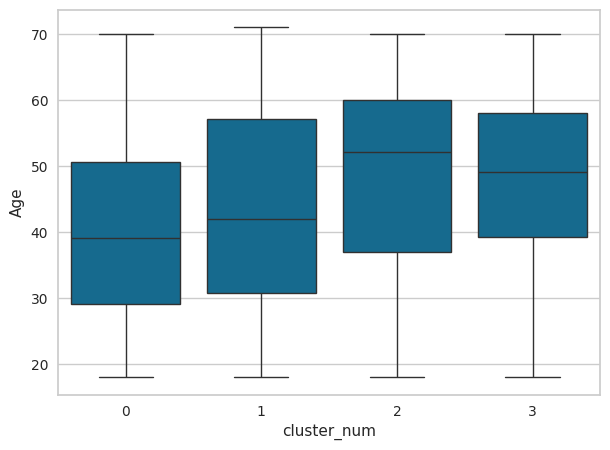

In [80]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

**Target Segment**

In [81]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [82]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [83]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [84]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


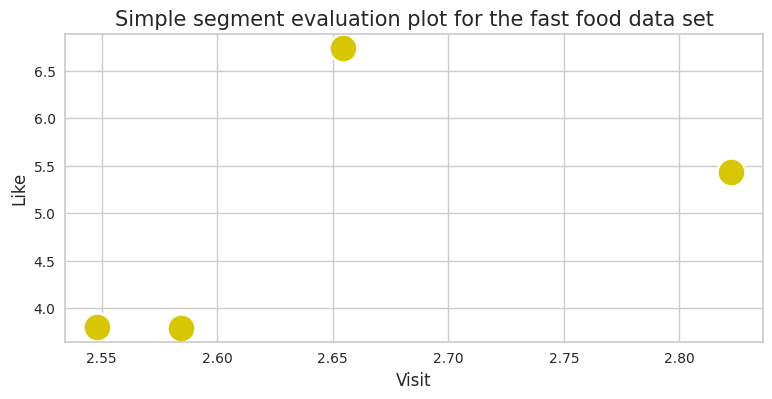

In [85]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="y")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()